In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import PIL
from scipy.ndimage import gaussian_filter

from pathlib import Path
import sys
sys.path.append(str(Path(__session__).parent.parent))

In [2]:
from utils import *
from detect import *
from scipy.ndimage import distance_transform_edt
from skimage.morphology import medial_axis, skeletonize
import matplotlib.pyplot as plt
import math

In [3]:
db = SalamandraDB(load_images=True)

In [4]:
salamandras = db.content
salamandra = salamandras['0']

In [5]:
mask = salamandras['0'].spots[0].detection.mask
p = mask_barycenter(mask)
arc = mask_arc_field_from_point(mask, p, -10, 10)
PIL.Image.fromarray((255. * arc).astype('uint8'))

In [7]:
PIL.Image.fromarray((255. * arc * mask).astype('uint8'))

In [30]:
a0 = [mask_barycenter_distance_quantile_area_ratio(spot.detection.mask, np.arange(0., 1., .1))[1] for spot in salamandras['0'].spots]
n0 = [np.array([v[0] for v in a[:2]]) for a in spot_nbhd(salamandras['0']).values()]
aa0 = [np.concat([a] + [0.5 * a0[nidx] for nidx in n0[idx]]) for idx, a in enumerate(a0)]
a1 = [mask_barycenter_distance_quantile_area_ratio(spot.detection.mask, np.arange(0., 1., .1))[1] for spot in salamandras['1'].spots]
n1 = [np.array([v[0] for v in a[:2]]) for a in spot_nbhd(salamandras['0']).values()]
aa1 = [np.concat([a] + [0.5 * a1[nidx] for nidx in n1[idx]]) for idx, a in enumerate(a1)]

In [31]:
n = np.array([[np.linalg.norm(v0-v1) for v1 in aa1] for v0 in aa0])
idx = 9
np.argpartition(n[idx,:], 10)

array([ 3, 12,  7, 17, 14, 21,  1, 13, 22,  9, 10, 27,  8, 18,  4, 19,  2,
        6, 26, 11,  5,  0, 28, 20, 15, 29, 24, 25, 16, 23])

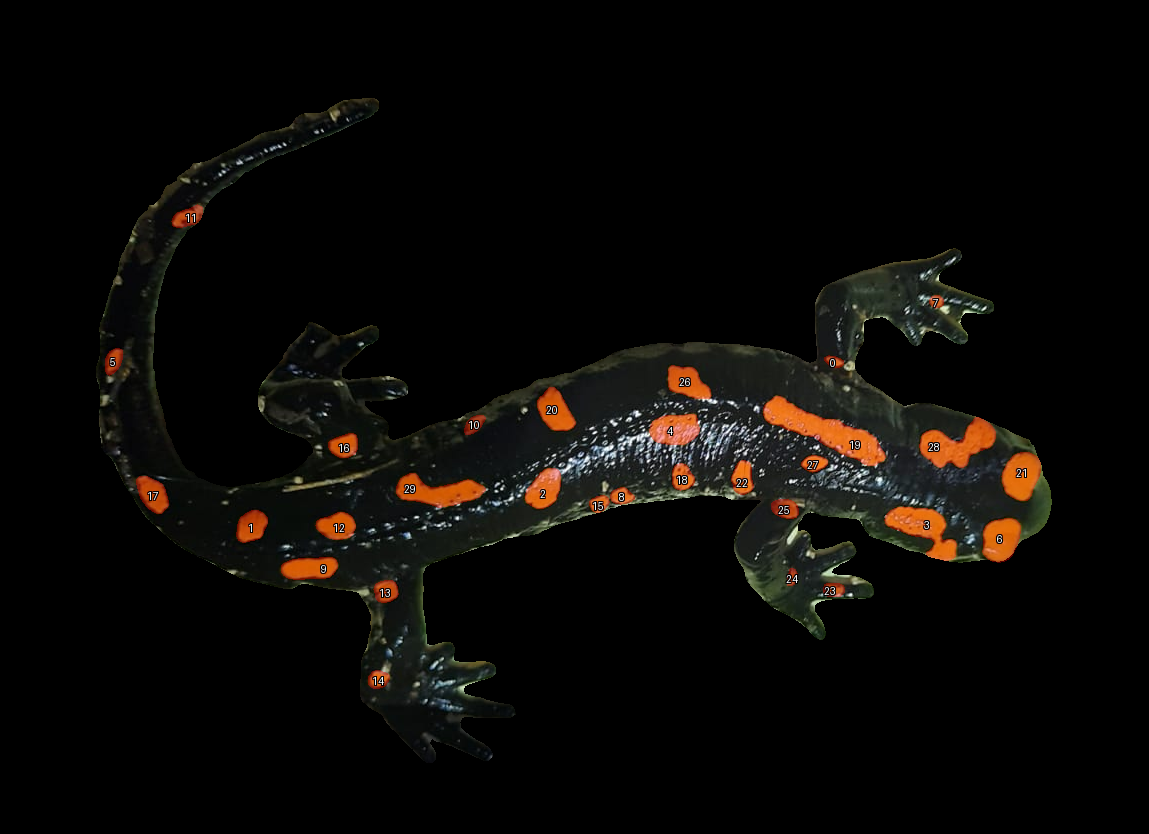

In [33]:
PIL.Image.fromarray(overlay_spot_masks_with_numbers(np.array(salamandras['0'].body.detection.masked_image), salamandras['0'].spots))

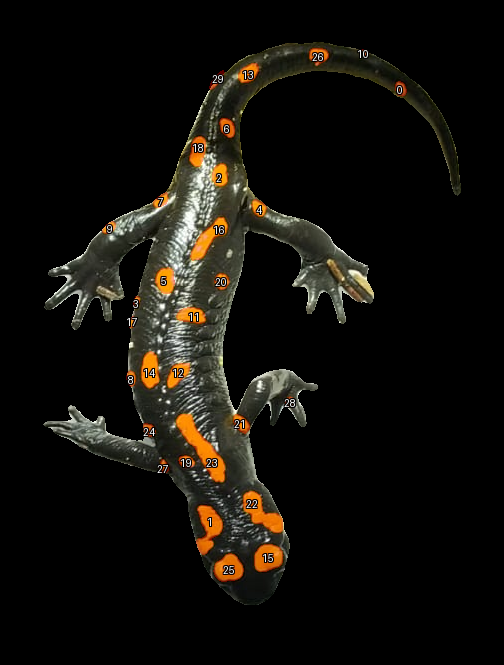

In [8]:
PIL.Image.fromarray(overlay_spot_masks_with_numbers(np.array(salamandras['1'].body.detection.masked_image), salamandras['1'].spots))

In [21]:
r = LOOKUP_RADIUS_FACTOR * scale
a_range = ANGLE_LOOKUP_RANGE
pp = trace_ridges(skel, skel_thin, r, a_range, R1_MUL * 4, A_RANGE_MUL * 2)
b = bezier_from_polyline(pp)

In [150]:
deep = dist * (dist >= scale)
deep_ridge = ridge_from_distance(deep)
r = LOOKUP_RADIUS_FACTOR * scale
a_range = ANGLE_LOOKUP_RANGE
pp = trace_ridges(ridge, deep_ridge, r, a_range, R1_MUL * 4, A_RANGE_MUL * 2)
b = bezier_from_polyline(pp)

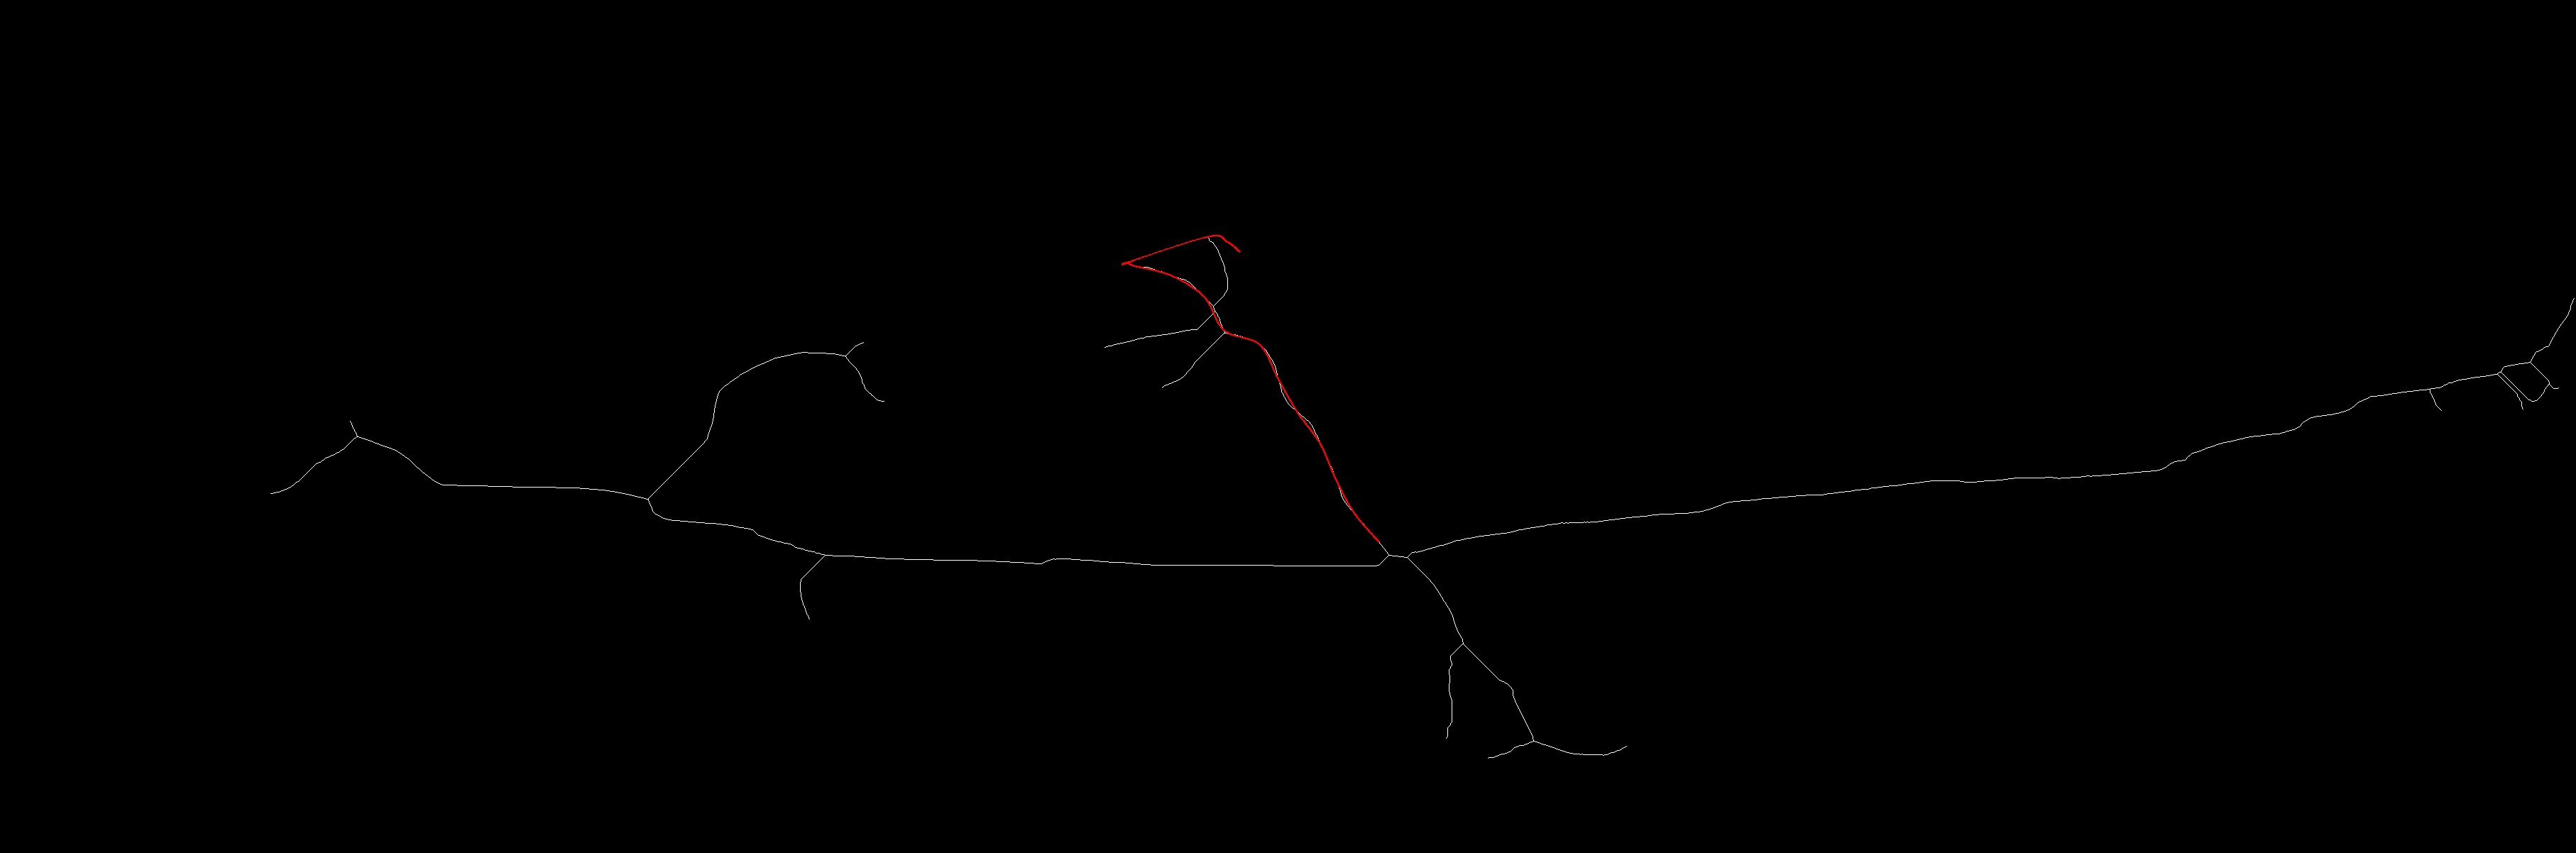

In [23]:
PIL.Image.fromarray(draw_bezier(skel_thin, b))

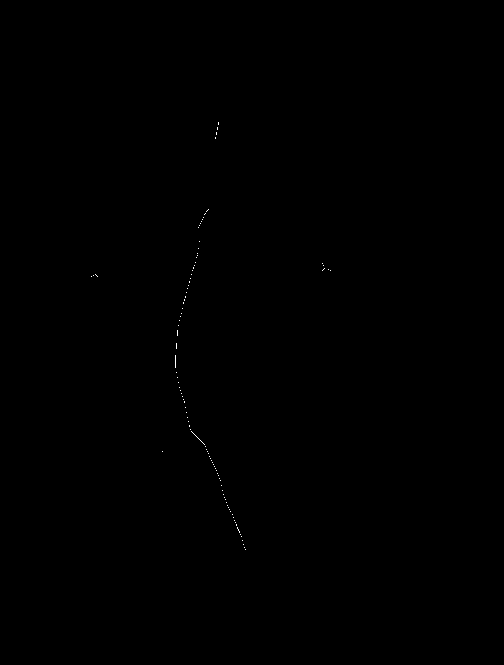

In [152]:
scale1 = np.quantile(dist[dist > 0], .7)
mid = dist * (dist >= scale1)
show_monochrome(ridge_from_distance(mid))